# **Hands-On DBSCAN Clustering**

This notebook provides a step-by-step, **visual** implementation of the **DBSCAN** (Density-Based Spatial Clustering of Applications with Noise) algorithm. We’ll:

1. Generate and visualize a small 2D dataset.  
2. Implement **DBSCAN** manually (no direct library calls).  
3. Illustrate each algorithmic step in real-time (using interactive plotting).  
4. Compare final cluster assignments and outliers.

---

## 📚 **Recall: What is DBSCAN?**

**DBSCAN** is an unsupervised clustering algorithm that groups data points based on their **density**. Two key parameters are:
- **ε (epsilon)**: The neighborhood radius.  
- **minPts**: Minimum number of points required within the ε-radius to form a dense region.

**Key advantages** of DBSCAN:
- Automatically discovers clusters of arbitrary shape.  
- Can detect and label outliers as “noise.”  
- Doesn’t require specifying the number of clusters in advance (unlike K-Means).

**Main concepts**:
1. **Core points**: Points with at least **minPts** neighbors within distance ε.  
2. **Border points**: Points within distance ε of a core point but with fewer than **minPts** neighbors themselves.  
3. **Noise (outliers)**: Points that do not belong to any cluster (i.e., not within the ε neighborhood of a core point).

---

### **Parameters in This Notebook**
- **epsilon (ε):** `0.4`  
  - Since our dataset points range approximately from 0 to 5 on both axes, an ε of 0.4 is chosen to capture local density.  
- **minPts:** `3`  
  - We require at least 3 points in a neighborhood for a point to be considered a **core**.

---


##**Imports and Dataset Creation**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# -- Updated 2D Dataset with smaller scale (0-5 range) --
# Three distinct clusters + several outliers
data = np.array([
    # Cluster 1 around (1, 1)
    [1.0, 1.0],
    [1.2, 0.9],
    [0.8, 1.1],
    [1.1, 1.2],
    [0.9, 0.8],

    # Cluster 2 around (3, 3)
    [3.0, 3.0],
    [3.2, 2.9],
    [2.8, 3.1],
    [3.1, 3.2],
    [2.9, 2.8],

    # Cluster 3 around (4, 1)
    [4.0, 1.0],
    [4.2, 0.9],
    [3.8, 1.1],
    [4.1, 1.2],
    [3.9, 0.8],

    # Outliers
    [0.5, 4.5],
    [4.5, 4.5],
    [2.5, 0.3],
    [2.0, 2.0]
])

# DBSCAN parameters - adjusted for the new scale
epsilon = 0.4  # Neighborhood radius
minPts = 3     # Minimum points required to form a dense region


**Explanation:**  
- Imports **NumPy** for numeric arrays and **matplotlib** for plotting.  
- Creates a small 2D dataset, including:
  - Three clusters: near (1,1), (3,3), and (4,1).  
  - Several **outlier** points scattered.  
- Defines **epsilon** (radius) and **minPts** (core point threshold).

## **Region Query Function and Initialization**


In [2]:
def region_query(idx):
    """Returns indices of all points within epsilon of point idx."""
    neighbors = []
    for j in range(len(data)):
        distance = np.linalg.norm(data[idx] - data[j])
        if distance <= epsilon:
            neighbors.append(j)
    return neighbors

# Track whether a point has been visited
visited = np.zeros(len(data), dtype=bool)

# Cluster assignments: -1 indicates noise or unassigned
cluster_assignments = -np.ones(len(data), dtype=int)

# Cluster IDs start at 0
cluster_id = 0


**Explanation:**  
- **region_query(idx)**: Loops over all points and checks if they are within distance **ε** of point `idx`.  
  - Uses `np.linalg.norm` for Euclidean distance.  
- **visited**: Array to mark which points have been checked.  
- **cluster_assignments**: Stores the **cluster ID** for each point. `-1` means **not assigned** or noise.  
- **cluster_id**: Integer that increments each time we discover a new cluster.


##**Interactive Plot Setup**

In [3]:
plt.ion()  # Turn on interactive mode
plt.figure(figsize=(10, 8))

def update_plot(title=""):
    """Helper function to clear and redraw the scatter plot with current assignments."""
    plt.clf()
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta']
    # Plot each data point
    for i in range(len(data)):
        if cluster_assignments[i] == -1:
            # Unassigned or noise
            plt.scatter(data[i, 0], data[i, 1], c='gray', marker='o', s=100)
        else:
            # Assigned to a cluster
            plt.scatter(data[i, 0], data[i, 1],
                        c=colors[cluster_assignments[i] % len(colors)],
                        marker='o', s=100)
    plt.title(title)
    # Set the axis limits for the new scale
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.pause(1)  # Pause for animation effect


<Figure size 1000x800 with 0 Axes>

**Explanation**  
- **Interactive mode** (`plt.ion()`) allows us to update the plot in real-time.  
- **update_plot**: Clears the current figure and redraws all data points according to `cluster_assignments`.  
  - Points with `-1` are plotted in **gray** (unassigned/noise).  
  - Other points are colored based on their **cluster_id**.



##**DBSCAN Main Loop with Step-by-Step Visualization**

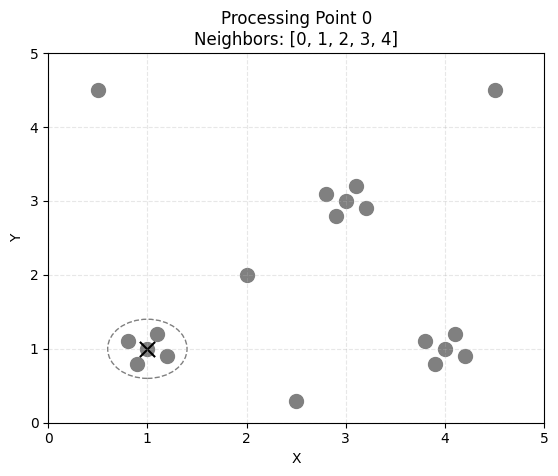

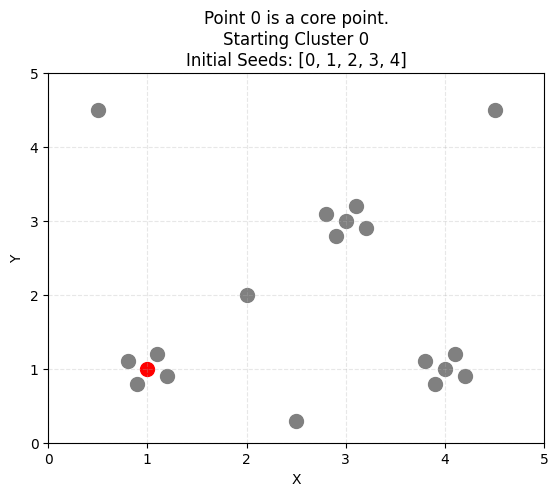

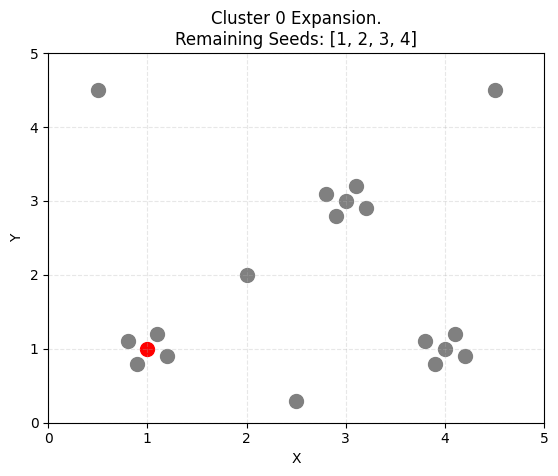

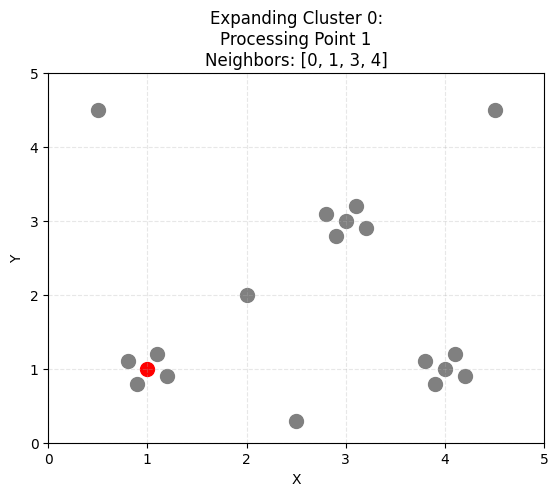

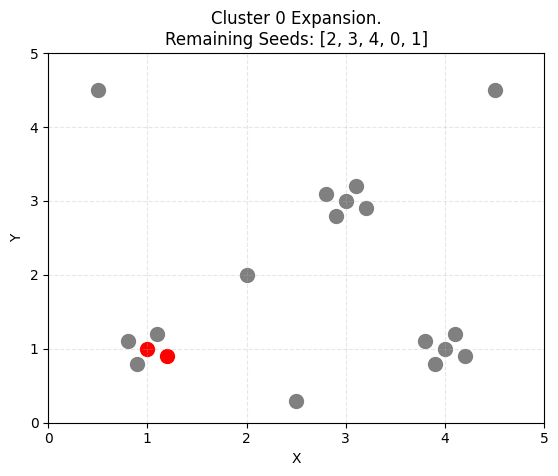

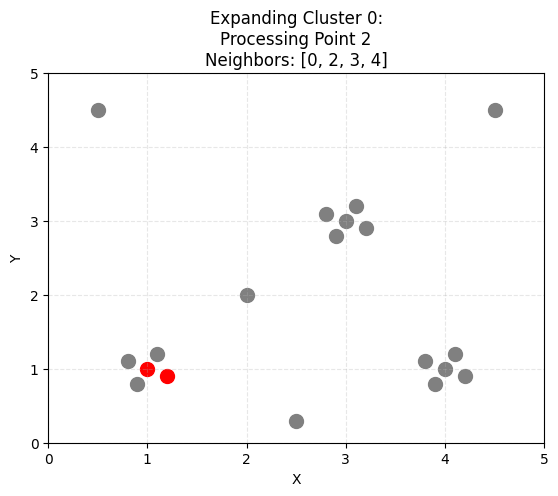

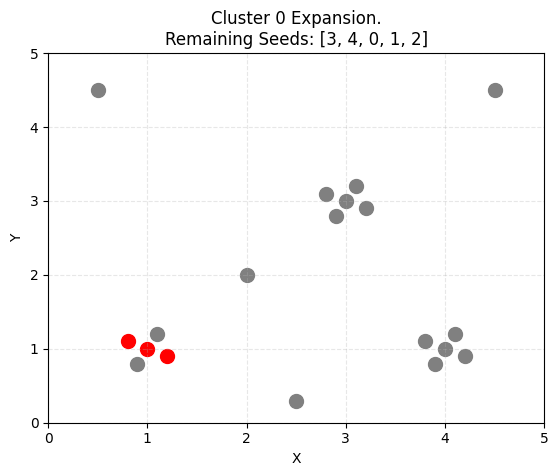

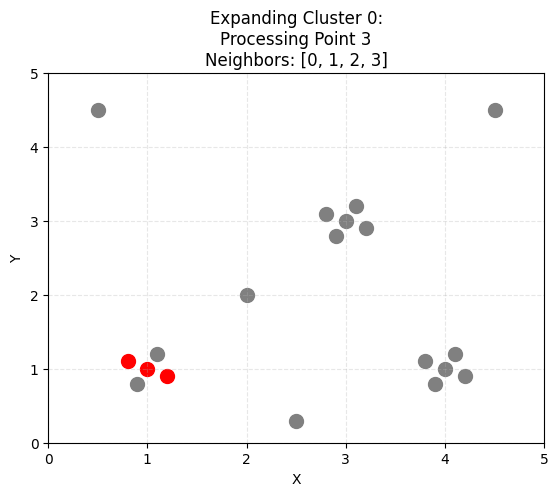

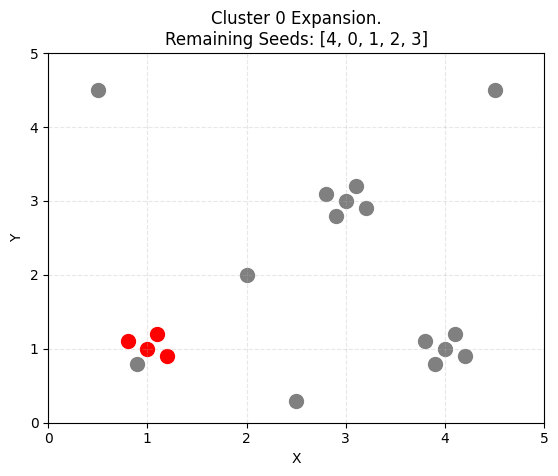

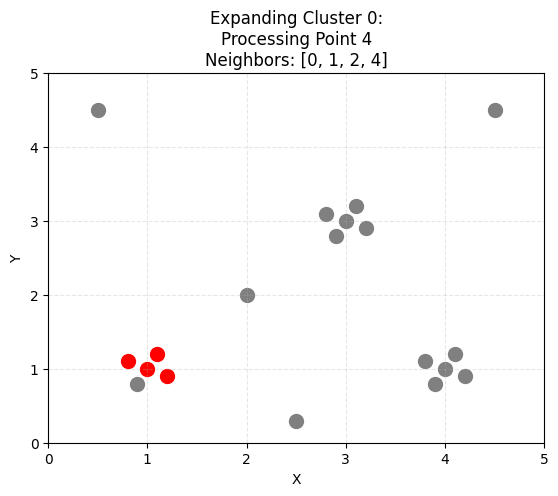

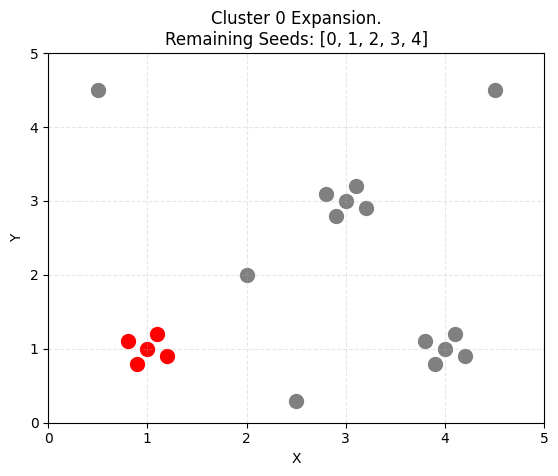

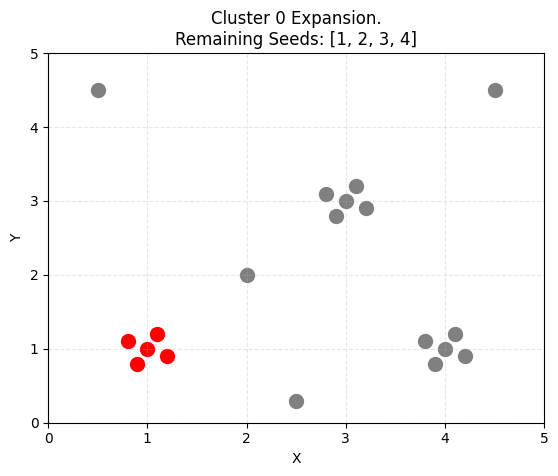

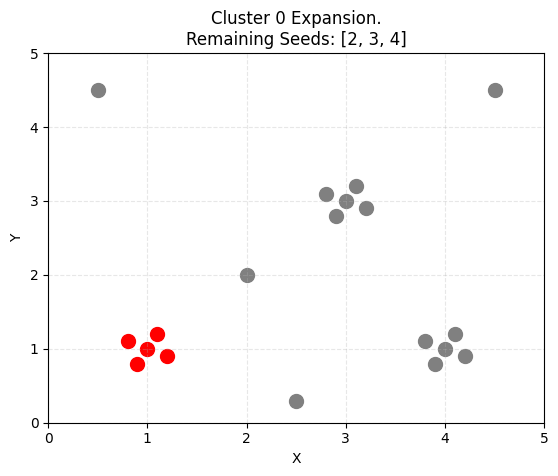

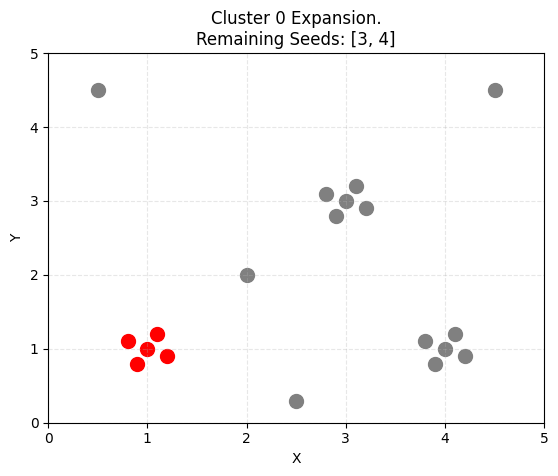

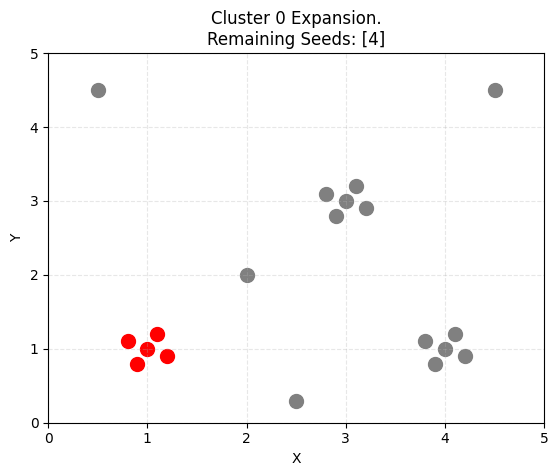

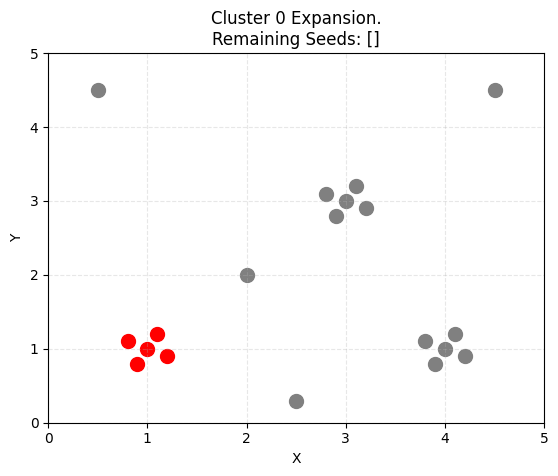

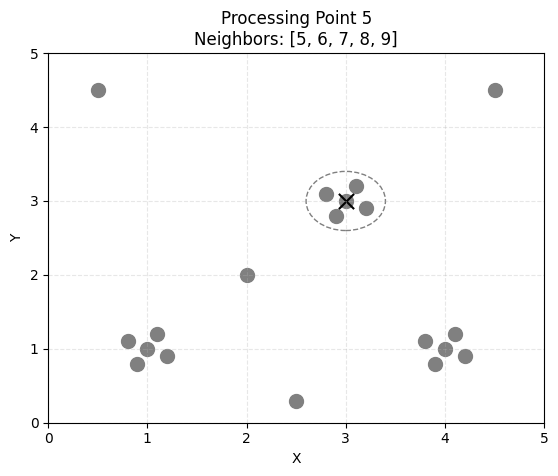

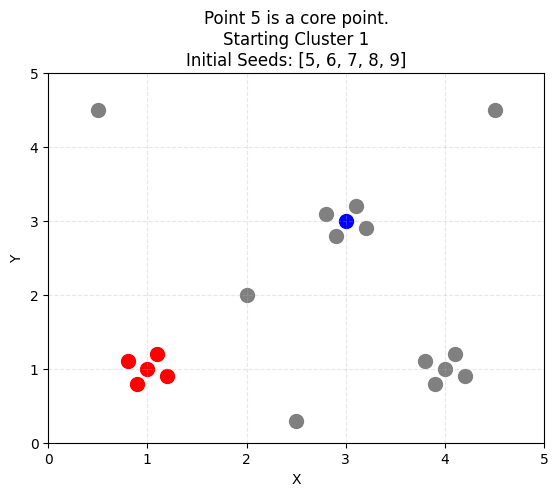

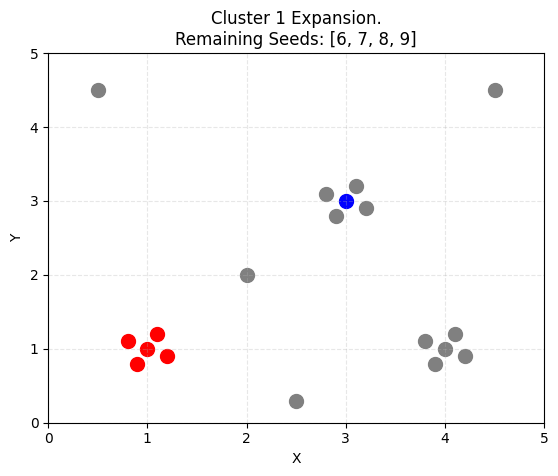

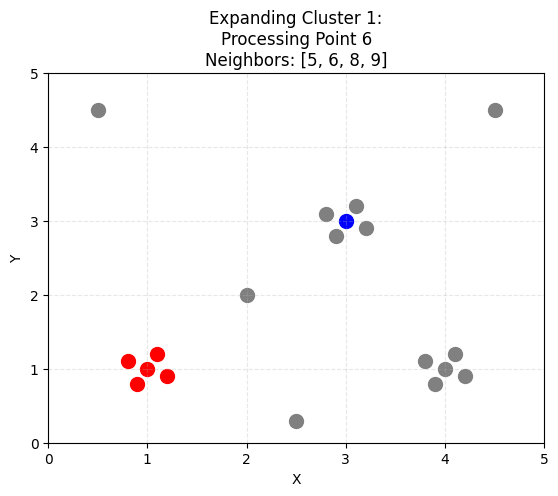

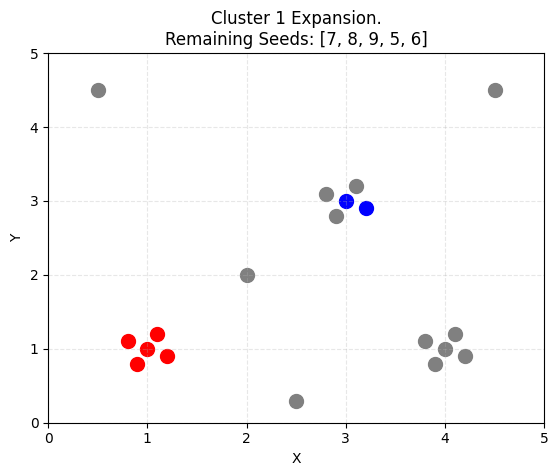

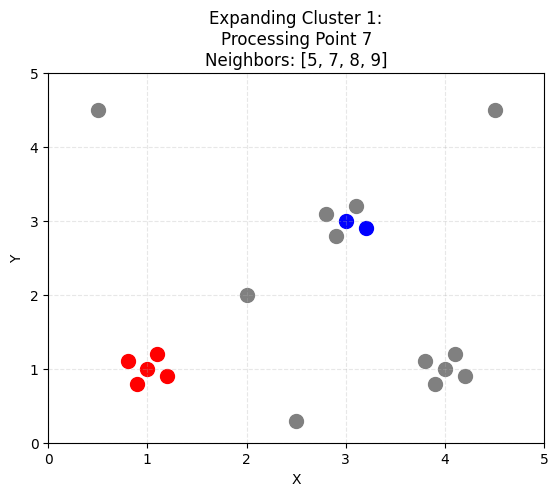

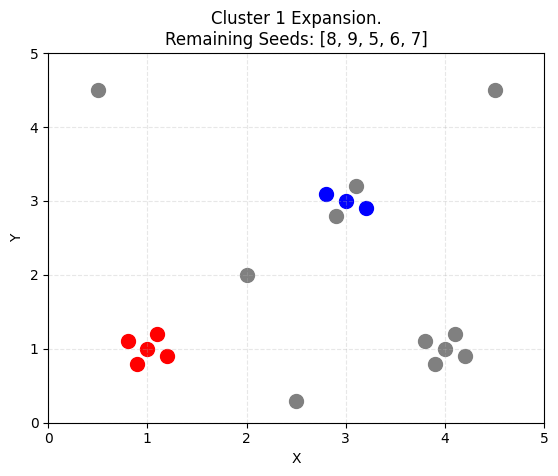

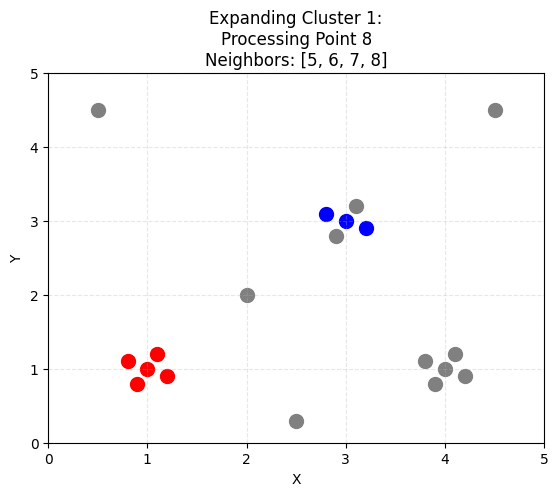

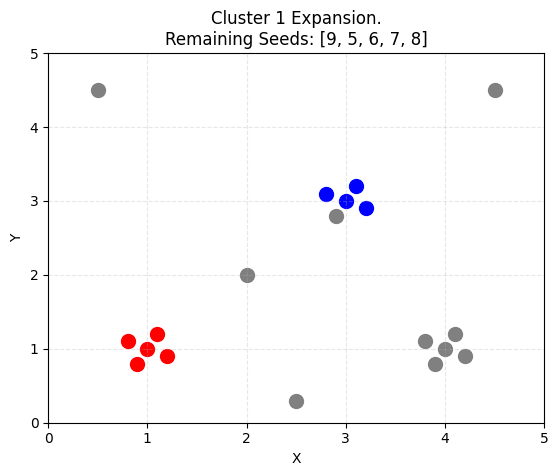

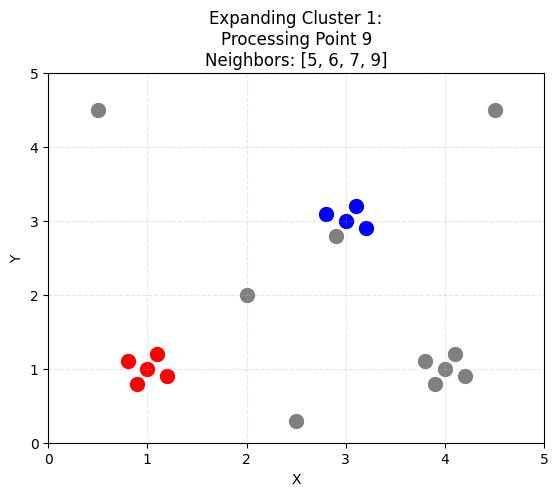

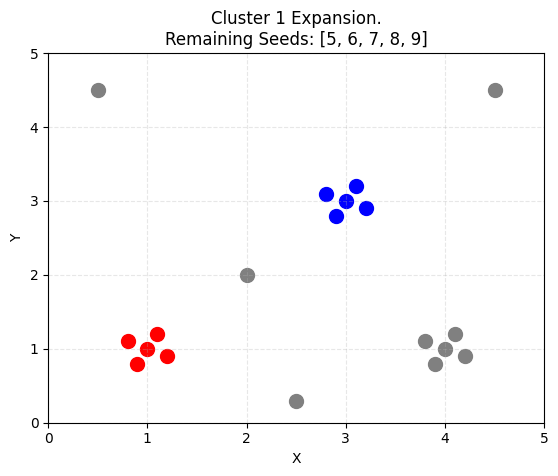

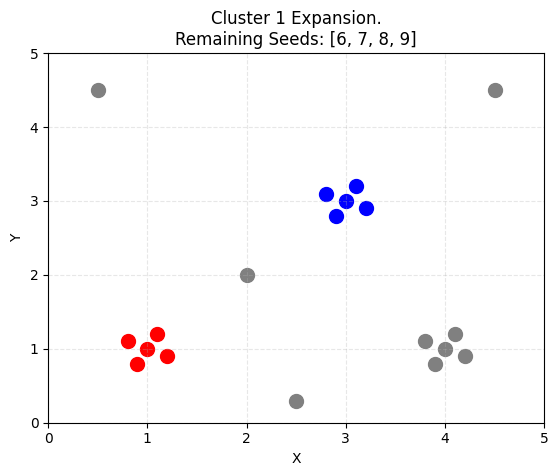

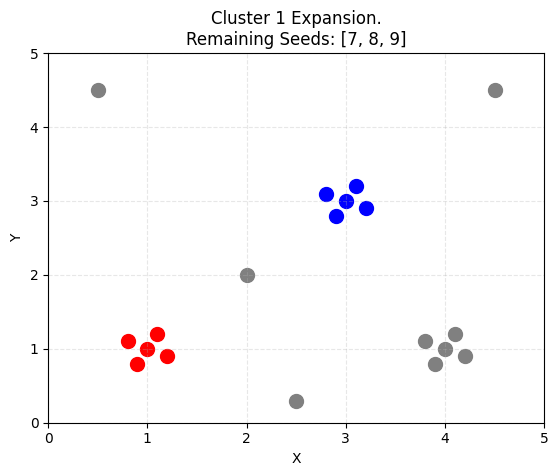

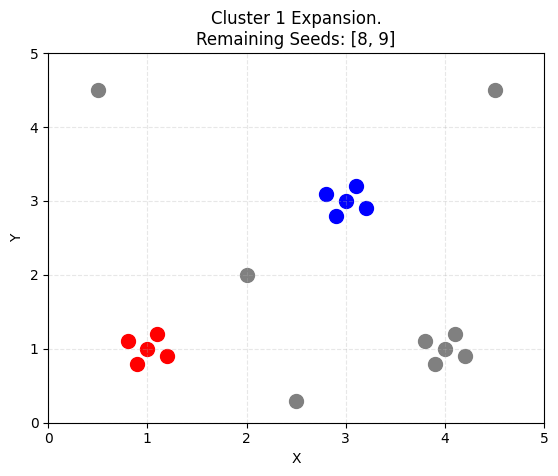

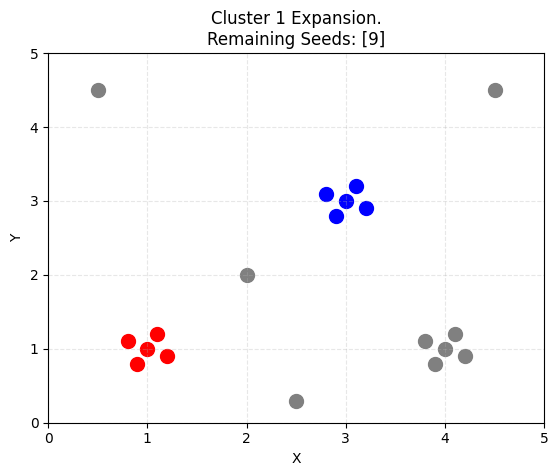

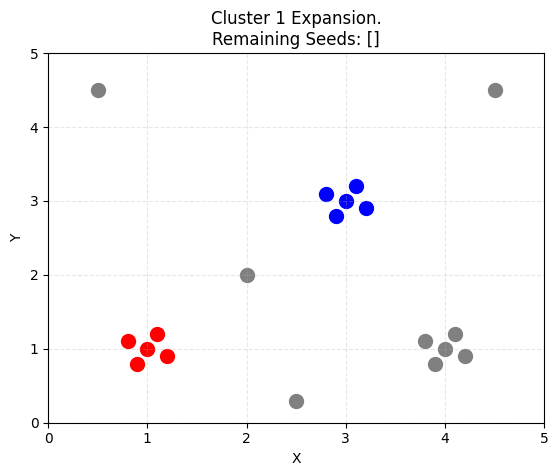

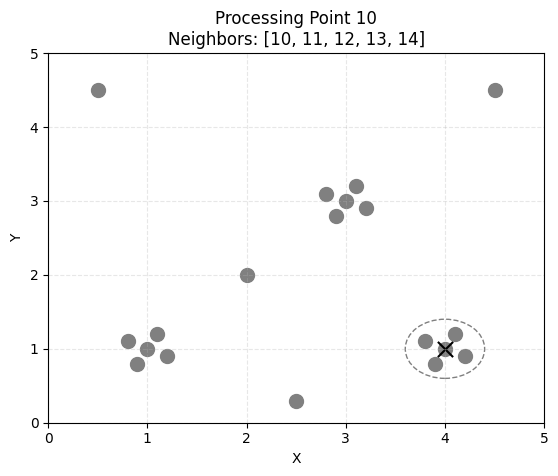

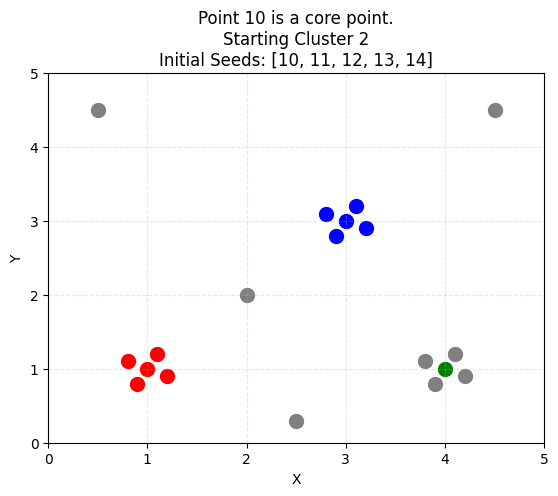

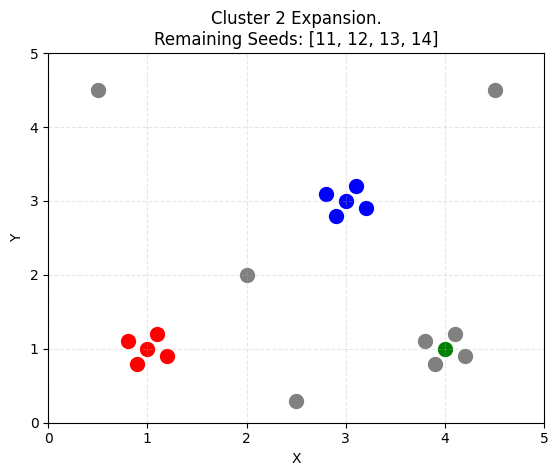

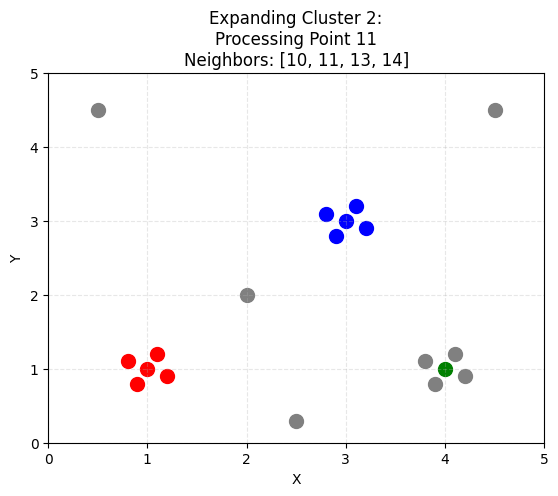

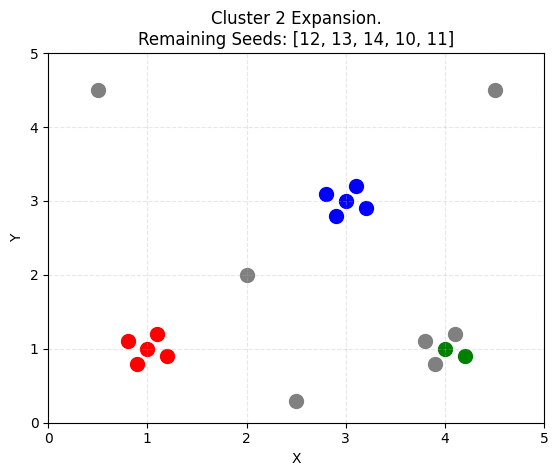

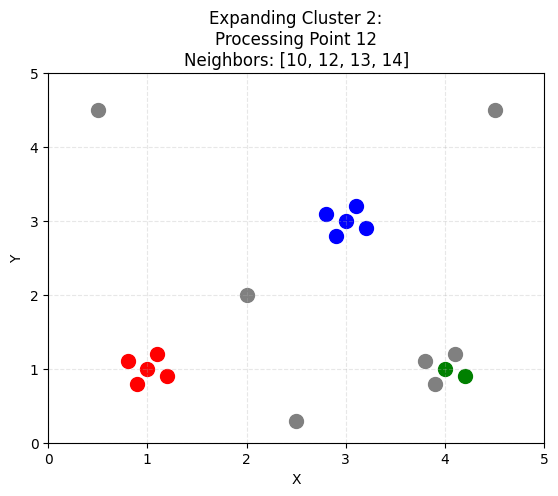

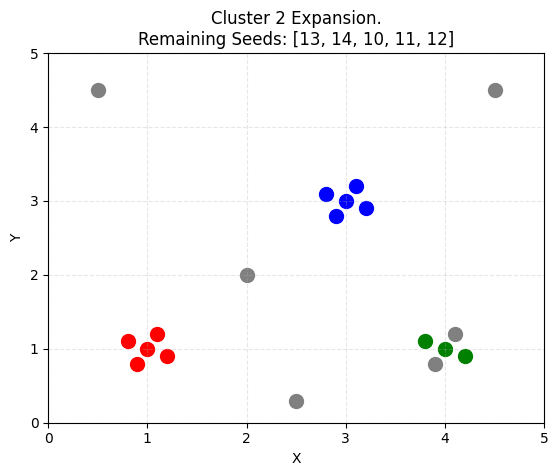

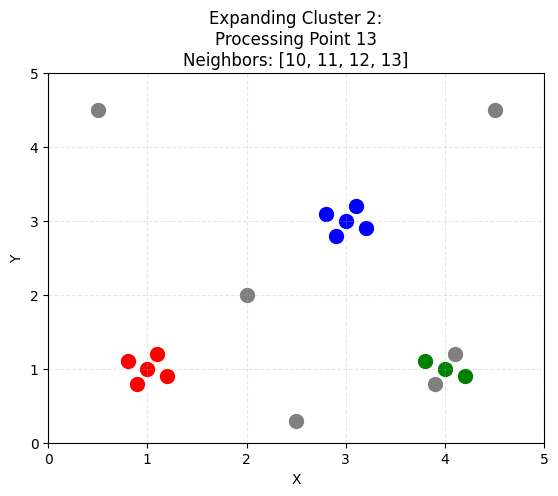

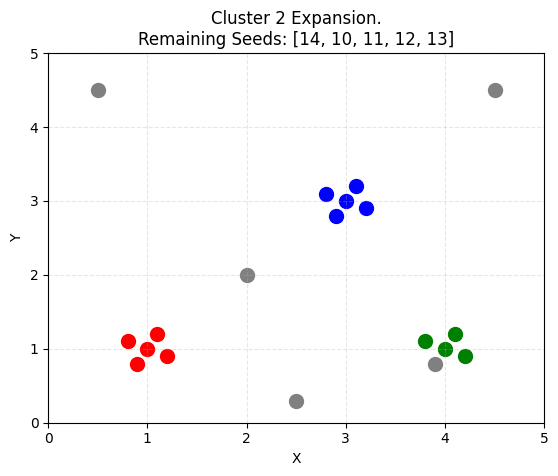

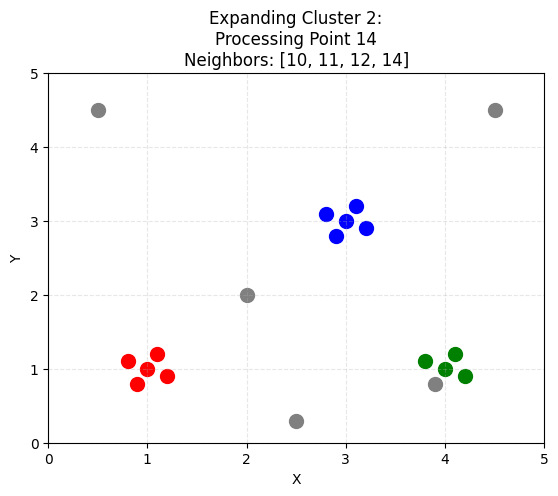

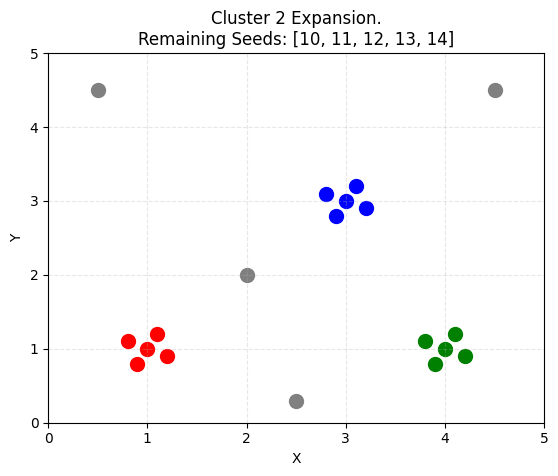

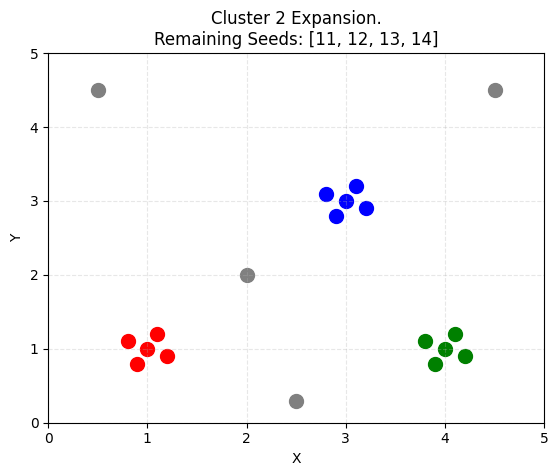

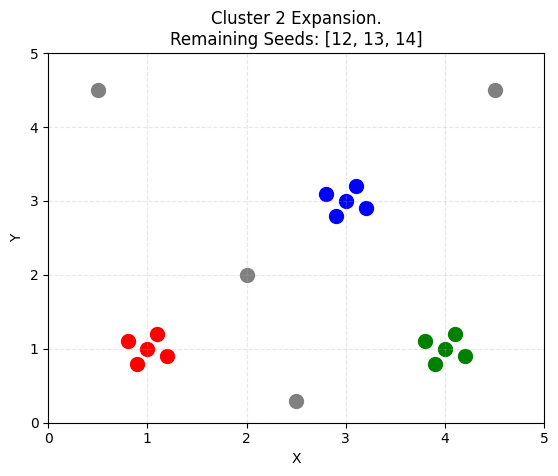

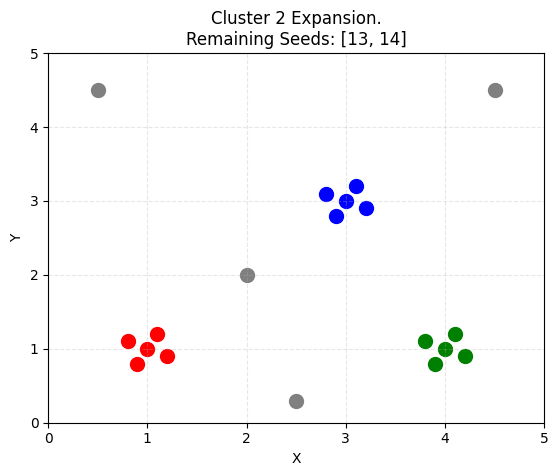

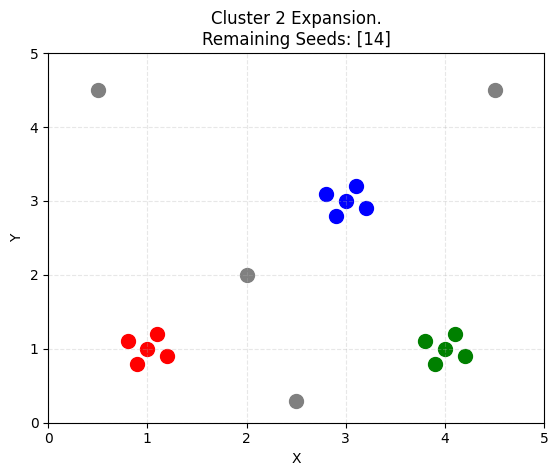

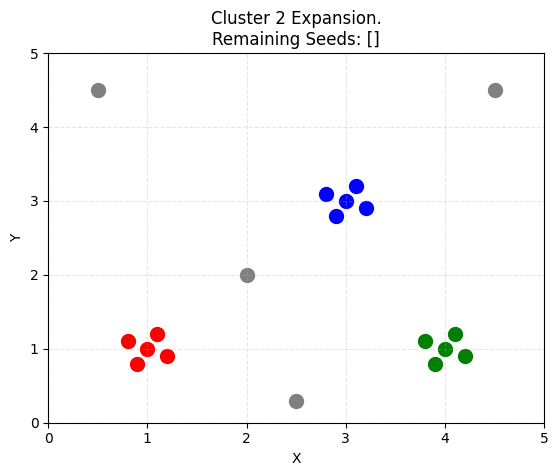

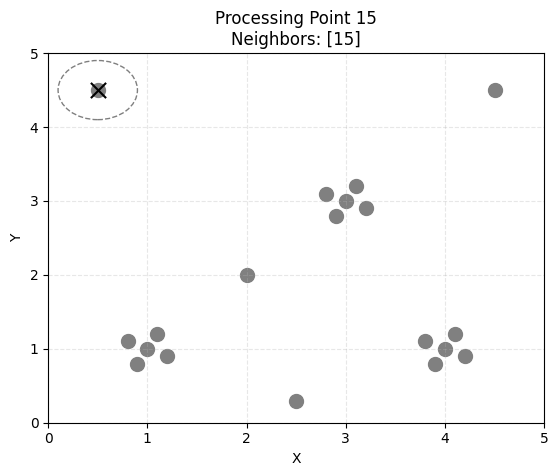

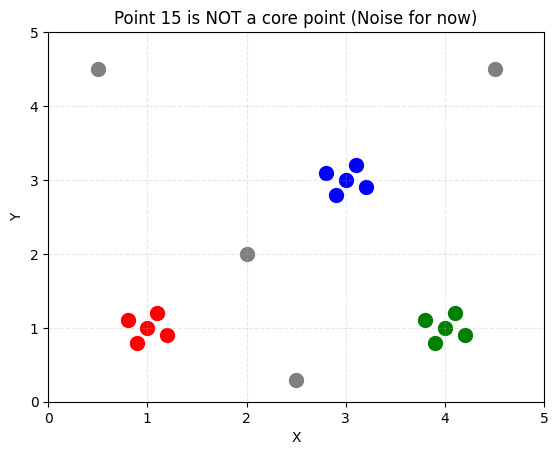

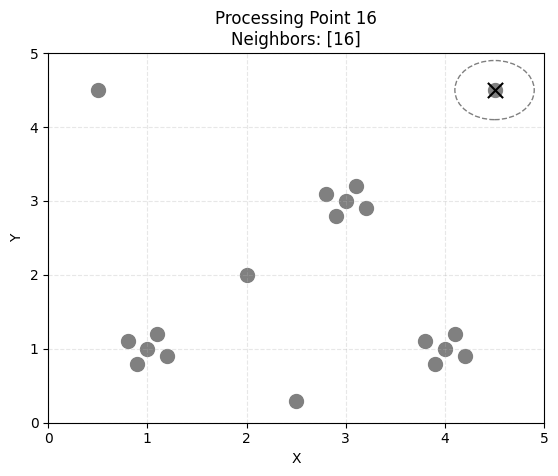

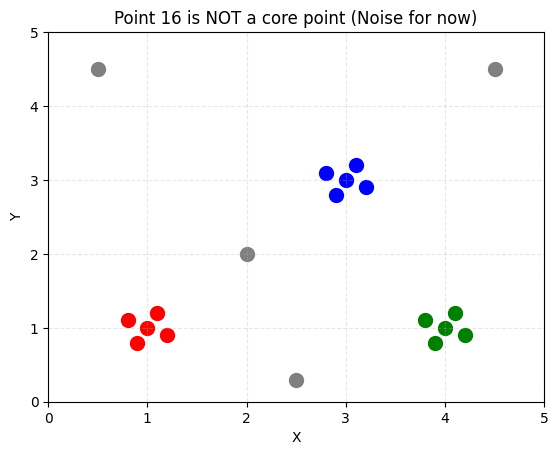

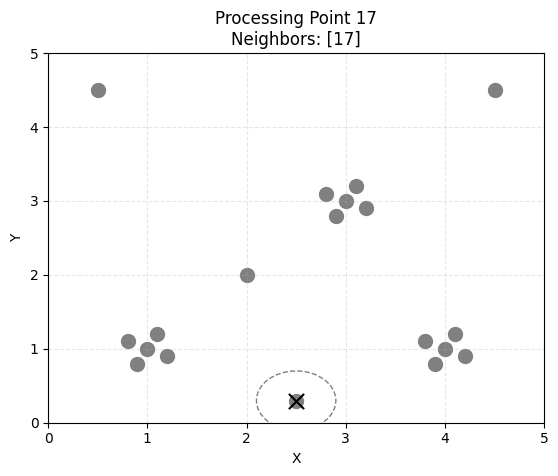

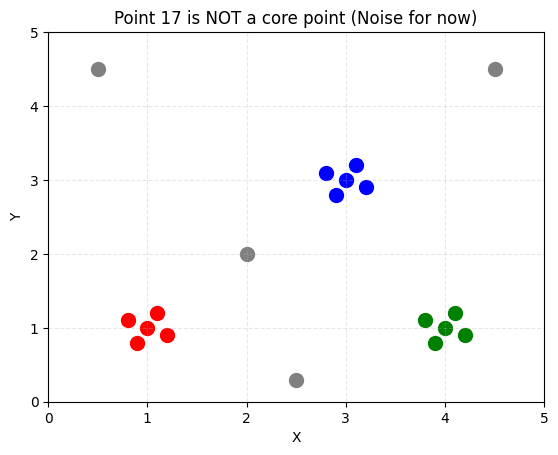

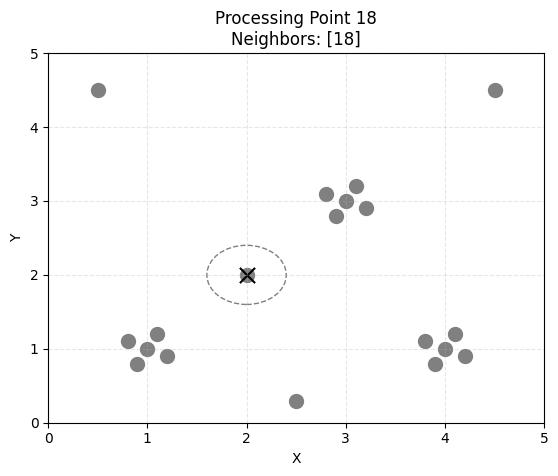

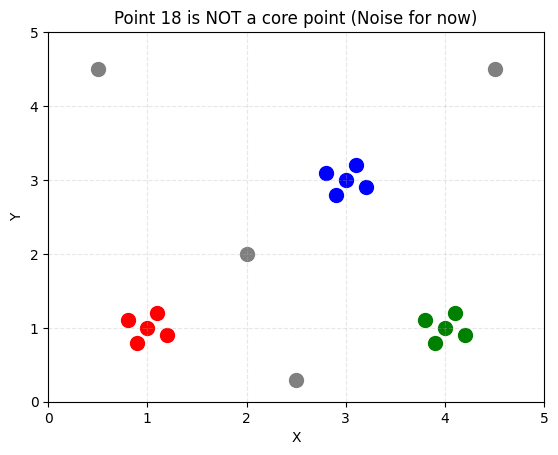

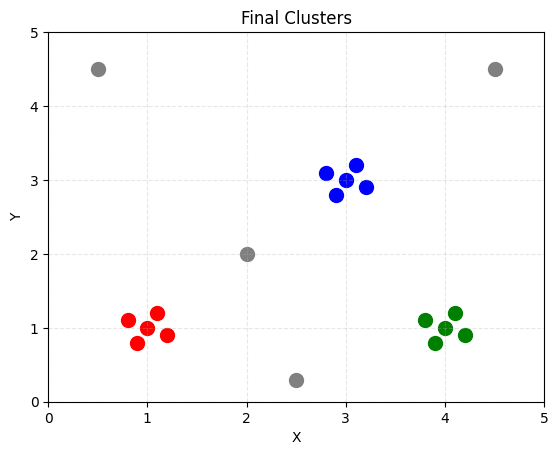

In [ ]:
for i in range(len(data)):
    if not visited[i]:
        visited[i] = True
        neighbors = region_query(i)

        # Step 1: Visualize the epsilon neighborhood of the current point
        plt.clf()
        plt.scatter(data[:, 0], data[:, 1], c='gray', s=100)
        circle = plt.Circle((data[i, 0], data[i, 1]), epsilon, color='black',
                            fill=False, linestyle='--', alpha=0.5)
        plt.gca().add_patch(circle)
        plt.scatter(data[i, 0], data[i, 1], c='black', s=120, marker='x')
        plt.title(f"Processing Point {i}\nNeighbors: {neighbors}")
        plt.xlim(0, 5)
        plt.ylim(0, 5)
        plt.grid(True, linestyle='--', alpha=0.3)
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.pause(2)

        # Step 2: Check if it's a core point
        if len(neighbors) < minPts:
            # Not a core point => temporarily label as noise (-1)
            cluster_assignments[i] = -1
            update_plot(f"Point {i} is NOT a core point (Noise for now)")
        else:
            # It's a core point => create a new cluster
            cluster_assignments[i] = cluster_id
            seeds = neighbors.copy()
            update_plot(f"Point {i} is a core point.\nStarting Cluster {cluster_id}\nInitial Seeds: {seeds}")

            # Step 3: Expand the cluster
            while seeds:
                current_point = seeds.pop(0)
                if not visited[current_point]:
                    visited[current_point] = True
                    new_neighbors = region_query(current_point)
                    update_plot(f"Expanding Cluster {cluster_id}:\nProcessing Point {current_point}\nNeighbors: {new_neighbors}")
                    if len(new_neighbors) >= minPts:
                        # If current_point is also core, merge neighbors
                        for n in new_neighbors:
                            if n not in seeds:
                                seeds.append(n)
                # If current_point was noise, reassign it to the current cluster
                if cluster_assignments[current_point] == -1:
                    cluster_assignments[current_point] = cluster_id
                update_plot(f"Cluster {cluster_id} Expansion.\nRemaining Seeds: {seeds}")

            # Once no more seeds, increment cluster ID
            cluster_id += 1

# Final plot to show the resulting clusters
update_plot("Final Clusters")
plt.ioff()  # Turn off interactive mode
plt.show()


**Explanation:**  
- **Main Loop**: Iterates over every point `i`.  
  1. **Check if visited**: If not, mark it visited and find neighbors within ε.  
  2. **Visualize** the neighborhood circle (radius = ε) for point `i`.  
  3. **Core check**:
     - If the number of neighbors < **minPts**, mark point `i` as noise (`-1`).  
     - Otherwise, **start a new cluster** and add all neighbors to a `seeds` list.  
  4. **Expand cluster**:  
     - While `seeds` is not empty, keep popping points:  
       - Mark unvisited points as visited, find their neighbors.  
       - If a neighbor has ≥ **minPts**, it becomes part of the same cluster (they are core as well).  
       - Noise points (`-1`) get reassigned to the current cluster if found within reach.  
  5. **Increment cluster_id** after finishing a cluster expansion.  

- The **update_plot** function is called repeatedly to show each step in the clustering process.



## **Observations and Insights**

- **Clusters Identified**: The algorithm should group points around (1,1), (3,3), and (4,1) into three distinct clusters, while marking distant points as noise.  
- **Noise Points**: The final assignment might label points like (0.5, 4.5) and (4.5, 4.5) as outliers, since they have fewer than 3 neighbors within ε=0.4.  
- **Parameter Sensitivity**:
  - Adjusting **epsilon** can drastically change the neighborhood size.  
  - Changing **minPts** can affect how strict the “core” requirement is (less/more noise).

## **Optional: "Do It Yourself" Tasks**

1. **Try Different Epsilon**  
   - Change the `epsilon` to `0.2` or `0.6`. How does it affect the number of clusters and outliers?

2. **Alter minPts**  
   - Increase `minPts` to `4` or `5`. Observe how your cluster assignments change.

3. **Random Dataset**  
   - Generate a **random 2D dataset** of 100 points in the range `(0, 10)` and apply this same DBSCAN code.  
   - Compare results vs. `sklearn.cluster.DBSCAN` to see if your manual implementation matches.

4. **Plot with Different Colors or Shapes**  
   - Modify the plotting to draw core points differently from border points.  
   - This requires distinguishing points that are not core but assigned to a cluster.



## 📚 **Further Reading and Resources**

- **DBSCAN Original Paper**: *Ester, Martin, et al. “A density-based algorithm for discovering clusters in large spatial databases with noise.” KDD. Vol. 96.*  
- **scikit-learn DBSCAN**: [DBSCAN Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)  
- **Interactive Demonstration**: [Density-Based Clustering in Python](https://towardsdatascience.com/clustering-with-dbscan-in-python-53a274f9aa18)

